<a href="https://colab.research.google.com/github/ViniciusBerti/20241_maua_ecm252_intro_git/blob/main/IMT_CD_P2_2025S1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




# **P2 - ECM514 Ciência de Dados (PAR)**

In [ ]:
#@markdown Nome completo e RA (*\<nome\>, \<RA\>*)
Aluno = 'Vinícius de Oliveira Berti, 21.01219-9' #@param {type:"string"}






In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import seaborn as sns

# **CASO: Titanic Survivals**

Os dados do acidente do Titanic são até hoje uma das maiores fontes de dados para correlacionar fatores de sobrevivência do ser humano a desastres. Faça a análise de alguns desses fatores.






In [6]:
df = sns.load_dataset('titanic')
df_sampled = df.sample(frac=0.90, random_state=2)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Q1. **A classe (`pclass`) de embarque do passageiro teve influência em sua sobrevivência?**


In [7]:
contingency_table = pd.crosstab(df['pclass'], df['survived'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"sim, teste Qui-Quadrado, estatística = {chi2:.3f}, valor p = {p:.3f}")

sim, teste Qui-Quadrado, estatística = 102.889, valor p = 0.000


## Q2. **Pelos dados, a idade do passageiro parece ter influência em sua sobrevivência?** (se necessário, exclua casos com idade ausente)


In [10]:
df_sampled_clean = df_sampled.dropna(subset=['age'])

idade_sobreviveu = df_sampled_clean[df_sampled_clean['survived'] == 1]['age']
idade_nao_sobreviveu = df_sampled_clean[df_sampled_clean['survived'] == 0]['age']

t_stat, p_value = ttest_ind(idade_sobreviveu, idade_nao_sobreviveu)

print(f"sim, teste t-Test Bilateral, estatística = {t_stat:.3f}, valor p = {p_value:.3f}")

sim, teste t-Test Bilateral, estatística = -2.113, valor p = 0.035


# **CASE: US House Sales**



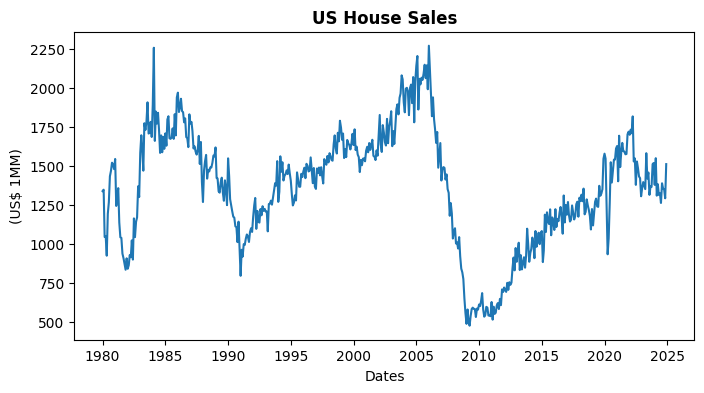

In [29]:
import pandas_datareader as pdr

reader = pdr.fred.FredReader(["HOUST"], start="1980-01-01", end="2024-12-01")
data = reader.read()
housing = data.HOUST
housing.index.freq = housing.index.inferred_freq

fig = plt.figure(figsize=(8, 4))
plt.plot(housing)
plt.title('US House Sales',weight='bold')
plt.xlabel('Dates')
plt.ylabel('(US$ 1MM)')
plt.show()


## Q3. Produza um gráfico como abaixo

Na economia encontramos muitos *ciclos* representados por perídos de crescimento, uma queda, e um novo ciclo. Faça um gráfico para delimitar e exibir um ciclo do seu início ao final da fase de crescimento.

Crie uma função,

```
plot_interval1(data_inicio_min, data_fim_min, data_inicio_max, data_fim_max)
```

Que dado dois intervalos de data, localiza o valor mínimo (do primeiro intervalo)  e o máximo (do segundo intervalo) delimitando esses valores no gráfico como abaixo.

Produza o gráfico o mais semelhante possível. A proporção entre os dois gráficos é 2:1 (largura).



In [15]:
plot_interval('1985-01-01', '1999-01-01', '1985-01-01', '2010-01-01')
plot_interval('2005-01-01', '2010-01-01', '2022-01-01', '2023-01-01')


NameError: name 'plot_interval' is not defined

## Q4. Modelo ARIMA

Considere os dados de crescimento do 1o ciclo (**1991-01-01 a 2006-01-01**). Determine os parâmetros p,d,q do modelo ARIMA (pode empregar todos os dados do intervalo desses dados). **Ao analisar os gráficos PACF e ACF, empregue valores de p e q sempre não superiores a 3**.


In [12]:
data_inicio_min, data_fim_min, data_inicio_max, data_fim_max  = '1985-01-01', '1999-01-01', '1985-01-01', '2010-01-01'
# data_inicio_min, data_fim_min, data_inicio_max, data_fim_max  = '2005-01-01', '2010-01-01', '2022-01-01', '2023-01-01'
...

ts = df[(df.index >= a) & (df.index <= b)]
display(ts.head())
display(ts.tail())

fig = plt.figure(figsize=(8, 4))

plt.plot(ts)
plt.title(f'Serie on Interval\n{str(a)[0:10]} - {str(b)[0:10]}')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.show()

NameError: name 'a' is not defined

### Teste de estacionariedade (Dickey-Fuller Aumentado - ADF), **$d$**



### Auto-correlação e Correlação Parcial, ACF e PACF, **$q, p$**



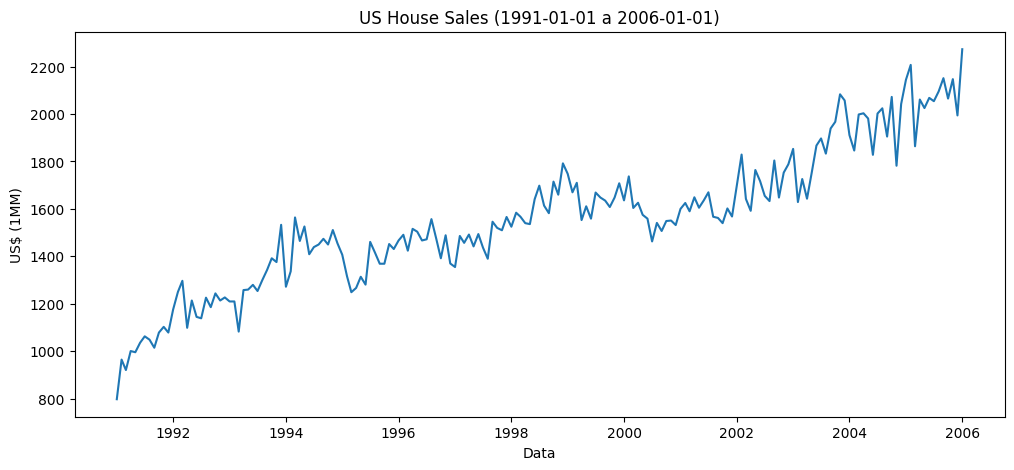

Estatística ADF: -0.9842602441338271
Valor p: 0.7589616406581461
Série NÃO estacionária (usar d=1 ou mais)


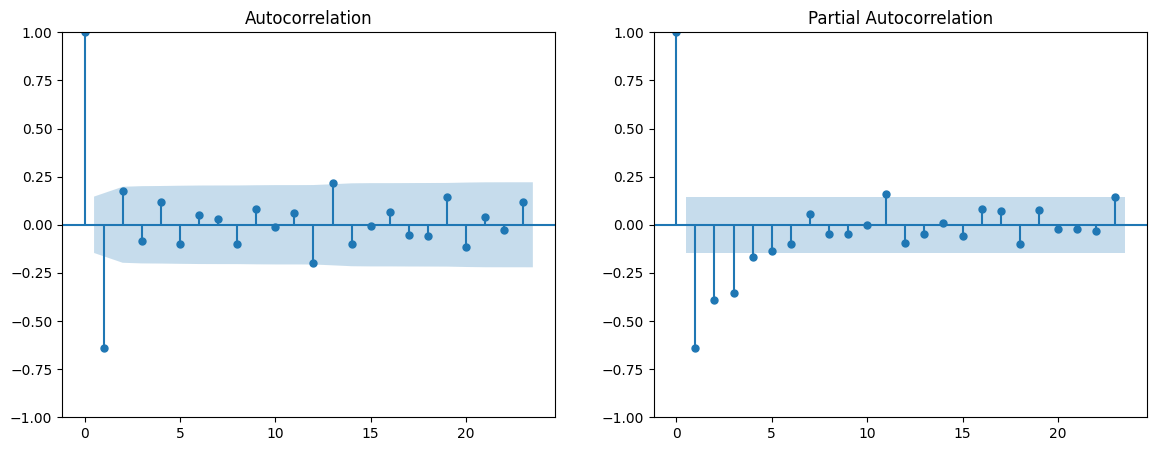

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  HOUST   No. Observations:                  181
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1051.772
Date:                Wed, 18 Jun 2025   AIC                           2113.544
Time:                        21:15:48   BIC                           2129.481
Sample:                    01-01-1991   HQIC                          2120.006
                         - 01-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4315      0.064    -22.348      0.000      -1.557      -1.306
ar.L2         -0.4710      0.061     -7.695      0.000      -0.591      -0.351
ma.L1         -0.0003      2.202     -0.000      1.0

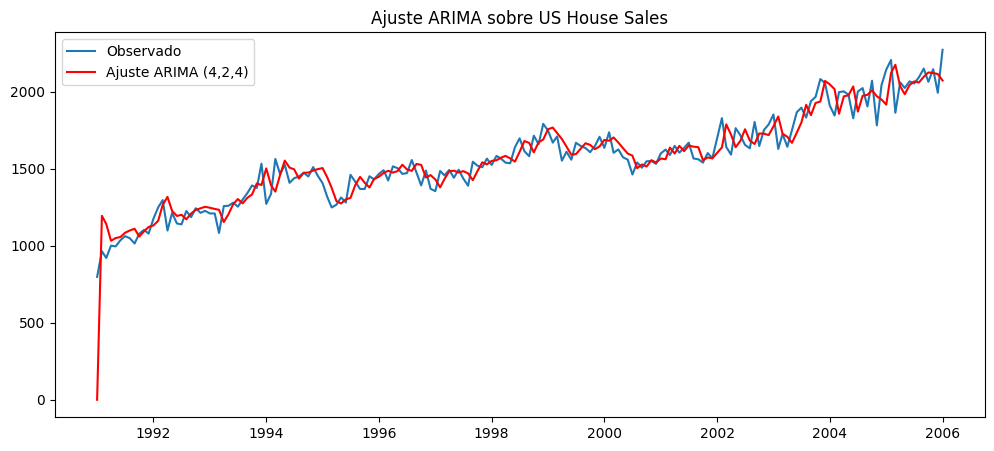

In [35]:
reader = pdr.fred.FredReader(["HOUST"], start="1980-01-01", end="2024-12-01")
data = reader.read()
housing = data.HOUST
housing.index.freq = housing.index.inferred_freq

interval = housing['1991-01-01':'2006-01-01']

plt.figure(figsize=(12,5))
plt.plot(interval)
plt.title('US House Sales (1991-01-01 a 2006-01-01)')
plt.xlabel('Data')
plt.ylabel('US$ (1MM)')
plt.show()

resultado_adf = adfuller(interval)
print('Estatística ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])

if resultado_adf[1] <= 0.05:
    print('Série estacionária (d=0)')
else:
    print('Série NÃO estacionária (usar d=1 ou mais)')

diff_series = interval.diff().diff().dropna()

fig, ax = plt.subplots(1,2, figsize=(14,5))
plot_acf(diff_series, ax=ax[0])
plot_pacf(diff_series, ax=ax[1])
plt.show()

modelo = ARIMA(interval, order=(2,2,2))
resultado = modelo.fit()

print(resultado.summary())

plt.figure(figsize=(12,5))
plt.plot(interval, label='Observado')
plt.plot(resultado.fittedvalues, label='Ajuste ARIMA (4,2,4)', color='red')
plt.title('Ajuste ARIMA sobre US House Sales')
plt.legend()
plt.show()

## Q5. Forecast

Aplique o modelo obtido para prever as 3 três últimas datas (conjunto de teste) do intervalo selecionado dos dados. Qual o valor previsto da última data de teste?   



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Previsões:
2005-11-01    2119.451876
2005-12-01    2101.291705
2006-01-01    2122.866169
Freq: MS, Name: predicted_mean, dtype: float64
Valores reais:
DATE
2005-11-01    2147
2005-12-01    1994
2006-01-01    2273
Freq: MS, Name: HOUST, dtype: int64


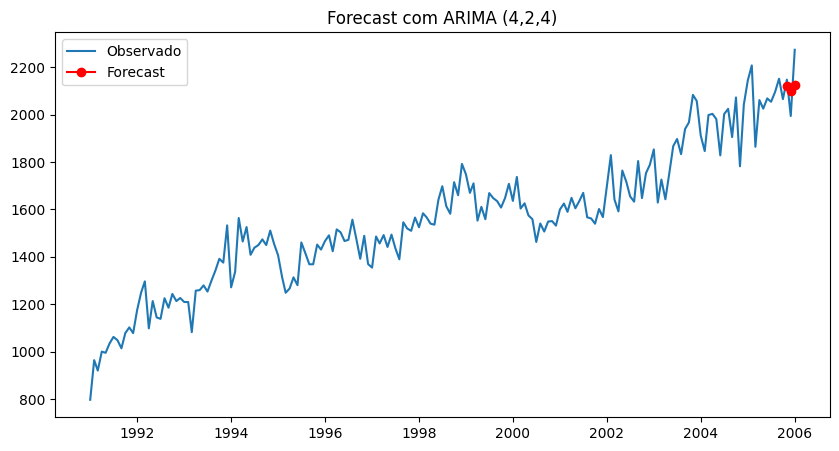

In [34]:
train = interval.iloc[:-3]
test = interval.iloc[-3:]

modelo = ARIMA(train, order=(2, 2, 2))
resultado = modelo.fit()

forecast = resultado.forecast(steps=3)

print('Previsões:')
print(forecast)

print('Valores reais:')
print(test)

plt.figure(figsize=(10,5))
plt.plot(interval, label='Observado')
plt.plot(forecast.index, forecast, label='Forecast', color='red', marker='o')
plt.title('Forecast com ARIMA (4,2,4)')
plt.legend()
plt.show()

## Q6. Análise dos Resíduos

Faça quaisquer dos testes estudados e verifique a normalidade dos resíduos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


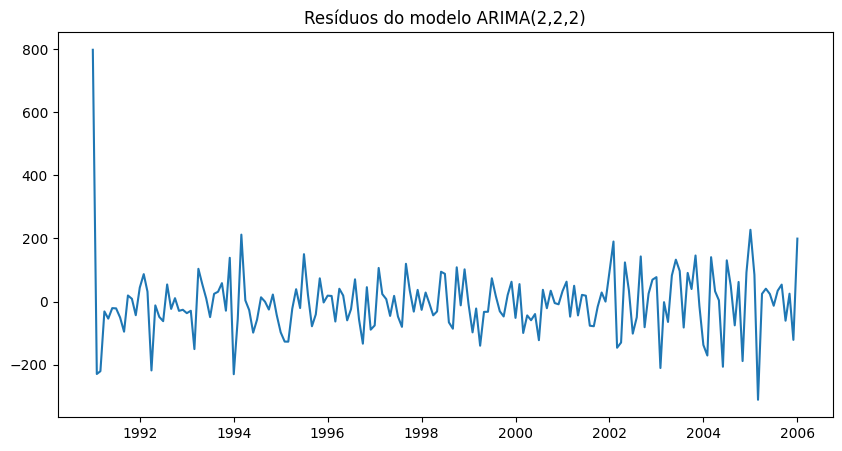

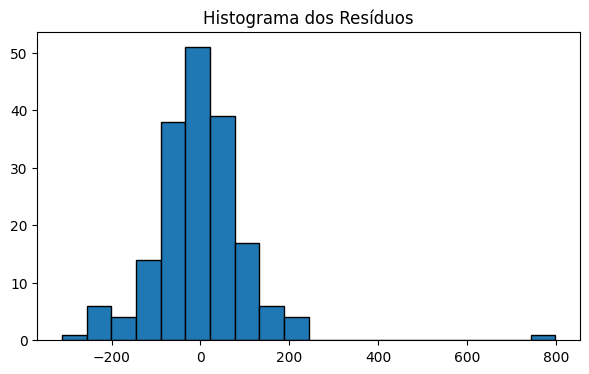

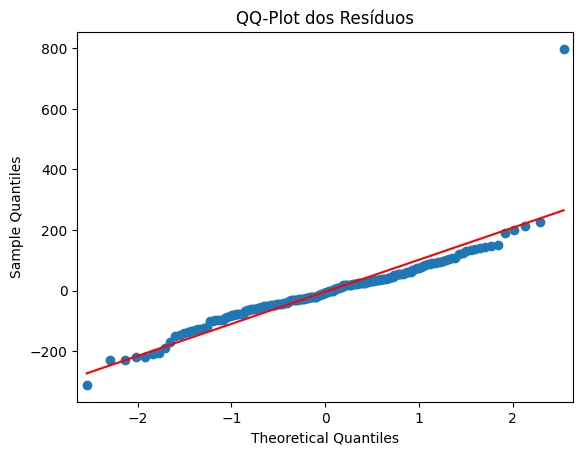

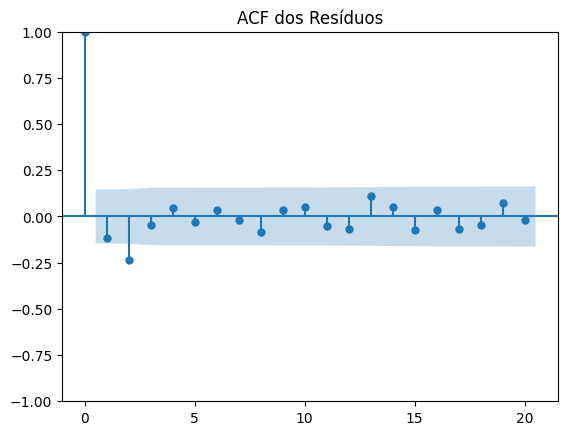

Shapiro-Wilk: Estatística = 0.8504, p-valor = 0.0000


ValueError: not enough values to unpack (expected 4, got 2)

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro, jarque_bera
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

model = ARIMA(interval, order=(2,2,2))
results = model.fit()

residuos = results.resid

plt.figure(figsize=(10,5))
plt.plot(residuos)
plt.title('Resíduos do modelo ARIMA(2,2,2)')
plt.show()

plt.figure(figsize=(7,4))
plt.hist(residuos, bins=20, edgecolor='black')
plt.title('Histograma dos Resíduos')
plt.show()

qqplot(residuos, line='s')
plt.title('QQ-Plot dos Resíduos')
plt.show()

plot_acf(residuos, lags=20)
plt.title('ACF dos Resíduos')
plt.show()

shapiro_stat, shapiro_p = shapiro(residuos)
print(f'Shapiro-Wilk: Estatística = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}')

jb_stat, jb_p, _, _ = jarque_bera(residuos)
print(f'Jarque-Bera: Estatística = {jb_stat:.4f}, p-valor = {jb_p:.4f}')

### Testes de normalidade do erro

## Q7. Análise do Erro

Qual a raiz do erro médio quadrático e o percentual de erro das predições sobre o conjunto de teste e de treinamento?

## Q8. Seleção de Modelos para vários parâmetros

Varie os parâmetros do ARIMA (máx 4) e verifique os melhores parâmetros de acordo com o AIC do modelo.

In [42]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

dados = interval

melhor_aic = np.inf
melhor_ordem = None
resultados = []

for p in range(0, 5):
    for d in range(0, 3):
        for q in range(0, 5):
            try:
                modelo = ARIMA(dados, order=(p, d, q))
                resultado = modelo.fit()
                aic = resultado.aic
                resultados.append({'ordem': (p, d, q), 'AIC': aic})

                if aic < melhor_aic:
                    melhor_aic = aic
                    melhor_ordem = (p, d, q)

                print(f'ARIMA({p},{d},{q}) - AIC: {aic:.2f}')
            except:
                continue

resultados_df = pd.DataFrame(resultados).sort_values(by='AIC').reset_index(drop=True)

melhor_modelo = resultados_df.iloc[0]
print('\nMelhor modelo:')
print(melhor_modelo)

ARIMA(0,0,0) - AIC: 2566.82
ARIMA(0,0,1) - AIC: 2424.78
ARIMA(0,0,2) - AIC: 2335.83
ARIMA(0,0,3) - AIC: 2301.20
ARIMA(0,0,4) - AIC: 2265.69
ARIMA(0,1,0) - AIC: 2155.79
ARIMA(0,1,1) - AIC: 2106.77
ARIMA(0,1,2) - AIC: 2108.62
ARIMA(0,1,3) - AIC: 2110.60
ARIMA(0,1,4) - AIC: 2111.13
ARIMA(0,2,0) - AIC: 2328.27
ARIMA(0,2,1) - AIC: 2150.89
ARIMA(0,2,2) - AIC: 2097.23
ARIMA(0,2,3) - AIC: 2099.23
ARIMA(0,2,4) - AIC: 2101.16
ARIMA(1,0,0) - AIC: 2173.07
ARIMA(1,0,1) - AIC: 2126.04
ARIMA(1,0,2) - AIC: 2127.89
ARIMA(1,0,3) - AIC: 2129.86
ARIMA(1,0,4) - AIC: 2130.38
ARIMA(1,1,0) - AIC: 2119.50
ARIMA(1,1,1) - AIC: 2108.63
ARIMA(1,1,2) - AIC: 2110.20
ARIMA(1,1,3) - AIC: 2112.07
ARIMA(1,1,4) - AIC: 2112.18
ARIMA(1,2,0) - AIC: 2230.71
ARIMA(1,2,1) - AIC: 2114.03
ARIMA(1,2,2) - AIC: 2099.23
ARIMA(1,2,3) - AIC: 2098.44
ARIMA(1,2,4) - AIC: 2100.39
ARIMA(2,0,0) - AIC: 2138.36
ARIMA(2,0,1) - AIC: 2127.89
ARIMA(2,0,2) - AIC: 2129.45
ARIMA(2,0,3) - AIC: 2131.33
ARIMA(2,0,4) - AIC: 2131.43
ARIMA(2,1,0) - AIC: 

# **CASE: Sun Spots**


## Q9. ARIMA?

Considere a série de dados de número de explosões/manchas solares observáveis. Podemos empregar um modelo ARIMA para a predição desta série de dados? Justifique suas resposta fazendo e apresentando sua análise dos dados.  

> **Faça um texto comentando suas células de código e justificando as suas análises.**

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
df = sm.datasets.sunspots.load_pandas().data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


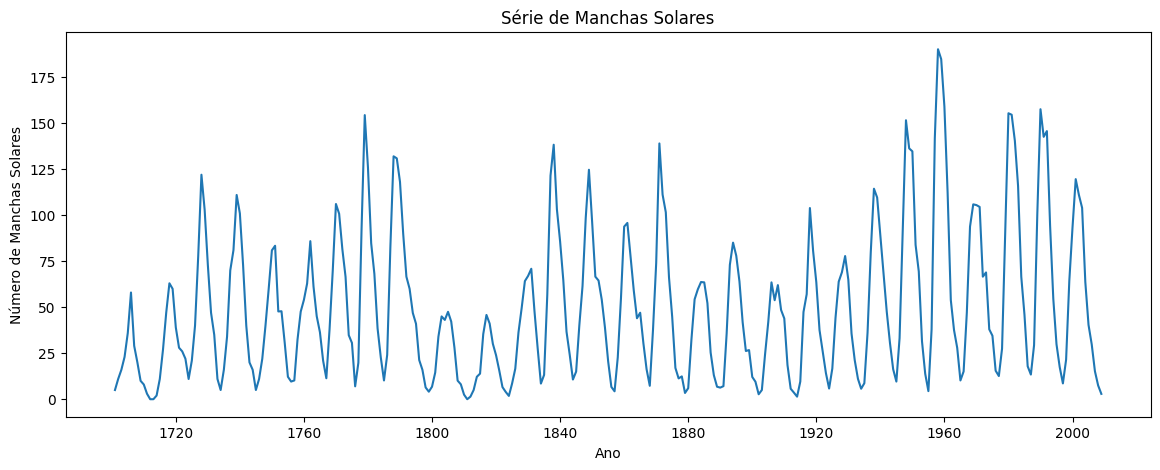

ADF Statistic: -2.8377807249381943
p-value: 0.053076421728120673
Série NÃO estacionária.


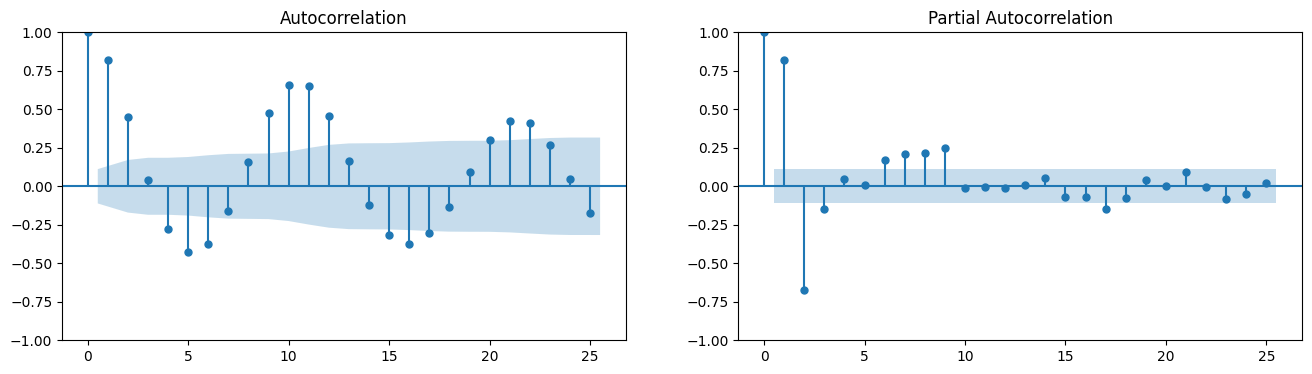

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -1273.034
Date:                Wed, 18 Jun 2025   AIC                           2570.068
Time:                        20:18:12   BIC                           2614.829
Sample:                    12-31-1700   HQIC                          2587.965
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5918      1.529      0.387      0.699      -2.404       3.588
ar.L2         -0.2078      0.552     -0.377      0.706      -1.289       0.873
ar.L3         -0.3051      0.378     -0.806      0.4

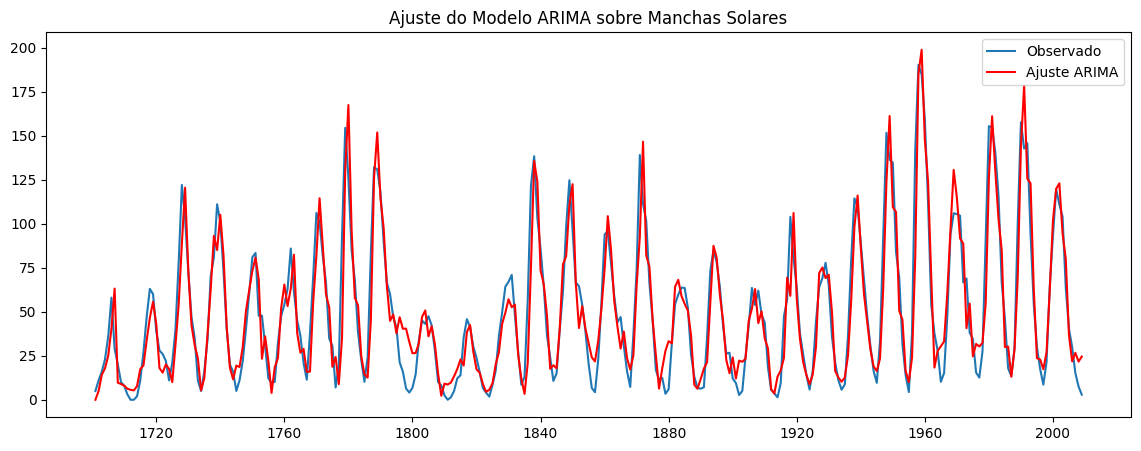

In [21]:
plt.figure(figsize=(14,5))
plt.plot(df['SUNACTIVITY'])
plt.title('Série de Manchas Solares')
plt.xlabel('Ano')
plt.ylabel('Número de Manchas Solares')
plt.show()

resultado_adf = adfuller(df['SUNACTIVITY'])
print('ADF Statistic:', resultado_adf[0])
print('p-value:', resultado_adf[1])

if resultado_adf[1] < 0.05:
    print("Série estacionária.")
else:
    print("Série NÃO estacionária.")

fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df['SUNACTIVITY'], ax=axes[0])
plot_pacf(df['SUNACTIVITY'], ax=axes[1])
plt.show()

modelo = ARIMA(df['SUNACTIVITY'], order=(9,1,2))
modelo_fit = modelo.fit()

print(modelo_fit.summary())

plt.figure(figsize=(14,5))
plt.plot(df['SUNACTIVITY'], label='Observado')
plt.plot(modelo_fit.fittedvalues, label='Ajuste ARIMA', color='red')
plt.title('Ajuste do Modelo ARIMA sobre Manchas Solares')
plt.legend()
plt.show()

## Resposta

A série de manchas solares apresenta um comportamento cíclico, com picos ocorrendo de forma regular ao longo do tempo. O teste de estacionariedade (ADF) indicou um p-valor de aproximadamente 0,053, sinalizando que a série não é estacionária. Por isso, foi necessário aplicar uma diferenciação (d=1) no modelo ARIMA. A análise dos gráficos de ACF e PACF indicou a escolha dos parâmetros (9,1,2), que resultaram em um ajuste satisfatório, acompanhando bem os picos e vales da série. Apesar disso, o padrão cíclico sugere que um modelo SARIMA, que considera sazonalidade, poderia oferecer um desempenho ainda melhor. De forma geral, o modelo ARIMA é aplicável, desde que a série seja devidamente diferenciada para tratar a não estacionariedade.

# **CASE: Game Analysis**

Um pesquisador está investigando a experiência de usuários em um jogo com diferentes dispositivos. Para isso ele selecionou alguns alunos da Universidade para testar os jogos. Cada jogador responde um questionário prévio com informações do seu perfil, realiza uma ou até 3 jogadas com os dispositivos *Skate*, *Joystick* e *Teclado*. Após as jogadas com cada dispositivo ele responde um questionário padrão de experiência do usuário cujo o resultado já se encontra aqui pré-processado.

In [22]:
path = 'https://github.com/Rogerio-mack/IMT_CD_2025/raw/main/data/'
df_games = pd.read_csv(path + 'df_games.csv')
df_post_games_Q = pd.read_csv(path + 'df_post_games_Q.csv')
df_pre_games_Q = pd.read_csv(path + 'df_pre_games_Q.csv')

display(df_games.head())
display(df_post_games_Q.head())
display(df_pre_games_Q.head())

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


,RA,device,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,21505616,joystick,5.000000,1.333333,1.0,2.333333
1,21505616,keyboard,4.666667,2.000000,1.0,2.333333
2,21505616,skate,3.166667,2.833333,1.0,1.666667
3,23513365,joystick,5.000000,1.000000,1.0,2.333333
4,23513365,keyboard,5.000000,1.000000,1.0,2.333333


,Carimbo de data/hora,RA,Data de nascimento,Gênero,Frequência que anda de skate,Frequência que usa jogos de computador,Frequência que usa jogos de console (Xbox / Playstation / Wii),Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet),Gênero de jogo preferido
0,2023-08-21 16:47:52.279,42118816,2003-06-07,Feminino,Nunca,Regularmente (algumas vezes por semana),Regularmente (algumas vezes por semana),Nunca,"Ação e aventura, RPG, Simulação, Corrida, Estr..."
1,2023-08-22 13:49:56.703,42145333,2000-11-26,Masculino,Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),"Ação e aventura, RPG, Estratégia"
2,2023-08-22 14:15:17.455,42326321,2004-11-29,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Raramente (algumas vezes por ano),Raramente (algumas vezes por ano),Esporte
3,2023-08-22 14:40:49.151,32339623,2004-07-13,Masculino,Nunca,Frequente (todos os dias),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),"Ação e aventura, RPG, Estratégia, MOBA"
4,2023-08-22 15:08:53.471,42305535,2005-09-09,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Nunca,Ocasionalmente (algumas vezes por mês),RPG


## Q10. Há diferença na 1a preferência ou na maior de percepção de desafio entre homens e mulheres ao experimentaram o jogo?

Os usuários, após a experiência com o jogo, também foram convidados a dar a sua preferência e percepção de desafio ao jogo classificando cada dispositivo de 1 (maior preferência e desafio) a 3 (menores).

In [28]:
df = pd.merge(df_post_games_Q, df_pre_games_Q[['RA', 'Gênero']], on='RA')

pref_homens = df[df['Gênero'] == 'Masculino']['Positive_Experience']
pref_mulheres = df[df['Gênero'] == 'Feminino']['Positive_Experience']

stat_pref, p_pref = ttest_ind(pref_homens, pref_mulheres)

desafio_homens = df[df['Gênero'] == 'Masculino']['Returning_to_Reality']
desafio_mulheres = df[df['Gênero'] == 'Feminino']['Returning_to_Reality']

stat_desafio, p_desafio = ttest_ind(desafio_homens, desafio_mulheres)

print(f"1ª preferência, {'sim' if p_pref < 0.05 else 'não'}, teste t, estatística = {stat_pref:.3f}, valor p = {p_pref:.3f}")
print(f"Percepção de desafio, {'sim' if p_desafio < 0.05 else 'não'}, teste t, estatística = {stat_desafio:.3f}, valor p = {p_desafio:.3f}")

1ª preferência, não, teste t, estatística = -1.416, valor p = 0.159
Percepção de desafio, não, teste t, estatística = -1.877, valor p = 0.063
